# Demonstration of Equilibrium for a Beam Structure
The following beam structure may not be completely shown, though it is complete enough to
discuss the principles of equilibrium.

![Beam Structure](images/eq/eq-demo-2-01.svg)

We will define some specific values and draw the Free Body Diagram.  At the left end (point $a$)
there is complete fixity (against horizontal and vertical displacements, as well as against rotation),
so there are correspondingly three forces, ($F_a$, $V_a$ and $M_a$).  At the right end
(point $c$) there is only a constraint against vertical displacement and so there is one 
vertical force, $V_c$, at that point.

![Beam FBD](images/eq/eq-demo-2-02.svg)

Considerinng the above FBD, there are 4 unknown forces shown, but we have only 3 equations of
equilibrium available.  That means there are an infinite number of sets of forces that satisfy
equilibrium.  To demonstrate that, we will show 2 of them:

![EQ Soln 1](images/eq/eq-demo-2-03.svg)

The above forces are in equilibrium:

In [1]:
0       # sum Fx, +ive right

0

In [2]:
+50 + 50 - 100     # sum Fy, +ive up

0

In [3]:
+200 - 50*8 + 100*2     # sum Mc, +ive ccw

0

But so is the following set of forces:

![EQ Soln 2](images/eq/eq-demo-2-04.svg)

In [4]:
0       # sum Fx, +ive right

0

In [5]:
+40 + 60 - 100     # sum Fy, +ive up

0

In [6]:
+120 - 40*8 + 100*2     # sum Mc, +ive ccw

0

So which set of forces, if either, is 'correct'?  It depends.  You have to know more about this
beam than has been shown so far.

## a) It Is Statically Determinate

If there are additional conditions specified where an internal force in the beam is required to
be a specific value, then we have additional equiations of equilibrium available to us.  These are equilibrium equations we can write on a *different* FBD that do not introduce additional unknowns.

For example, we might have a hinge in the beam
at point $d$, 4m from the right support.  That specifies that the
internal bending moment in the beam is zero at that support, and allows us to form a FBD on one side of the pin.  We choose a side that allows us to write an equilibrium equation that contains only
one unknown; here the right side:

![FBD Right Side](images/eq/eq-demo-2-03c.svg)

Knowing the moment is 0 at point $d$, we can write an equilibrium equation $\sum M_d = 0$ that does not
reference either of the two new unknowns, $H_d$ nor $V_d$:

$$
\begin{align}
V_c\times 4 - 100\times (4-2) &=& 0\\
V_c &=& 50\\
\end{align}
$$

With a hinge at that location, here is the only correct set of forces (that satisfy all 4 equilibrium
equations):

![Soln 1](images/eq/eq-demo-2-03b.svg)

On the other hand, if the hinge is 5m from the right support, here are the only forces that
satisfy all 4 quilibrium equations:

![Soln 2](images/eq/eq-demo-2-04b.svg)

## b) It Is Statically Indeterminate

On the other hand, there may be no conditions that allow for extra equilbrium equations.

If that is the case we must use knowledge of the elastic properties of the beam and this will
allow us to develope a *compatibility* equation to choose a set of forces such that the beam
deflections are correct.

For example, if there were no internal hinge, we could work out the vertical deflection at point
$c$ for each of the set of forces above.  It is quite likely that the resulting deflection would not be zero,
but we know it should be (the support constrains the vertical deflection to be zero).  In that case,
neither set of forces is correct.

We will use the method of 'consistent deformation' with displacements calculated by the
method of 'virtual work'.

> **Note:** the following is very briefly described.  It will be improved at sometime in the future.

![Beam Structure](images/eq/eq-demo-2-01.svg)

![Beam Structure](images/eq/eq-demo-2-05.svg)

In [7]:
from sympy import symbols, solve, integrate, init_printing
init_printing()

In [8]:
EI,L,P,d,x,Vc = symbols('EI L P d x Vc')

Expressions for bending moments in the released structure, $M$ (due to the real loads),
and $m$ (due to virtual loads), as functions of $x$, the distance from the right support.

In [9]:
M = -P*(x-d)
M

In [10]:
m = x
m

'Delta' is the displacement in the released structure due to the real loads.  The +ive direction is
the direction of the unit virtual load.

In [11]:
Delta = integrate(m*M/EI,(x,d,L))
Delta

'delta' is the displacement in the released structure due to a unit value of the redundant force (the
vertical reaction at $c$)

In [12]:
delta = integrate(m*m/EI,(x,0,L))
delta

Write a compatibility equation for displacement at point $c$ (that displacement is 0, so
this calculates the value of the reaction at $c$ that makes it so):

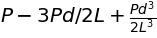

In [13]:
eqn = Delta + Vc*delta
soln = solve(eqn,Vc)[0]
soln

Substitute numerical values for the parameters to get a numerical
value for the reaction at $c$:

In [14]:
rVc = soln.subs({L:8,d:2,P:100}).n()
rVc

Now write 3 equilbrium equations and solve them for the remaing 3 reactions:

In [15]:
Ha,Va,Ma = symbols('Ha Va Ma')

In [16]:
eqns = [Ha,                      # sum Fx, +ive right
       Va + Vc - P,              # sum Fy, +ive up
       Ma + Vc*L - P*(L-d)]      # sum M about a, +ive ccw

In [17]:
solns = solve(eqns,[Ha,Va,Ma])
solns

And substitute to get their numerical values:

In [18]:
rHa = solns[Ha].subs({L:8,d:2,P:100,Vc:rVc})
rHa

In [19]:
rVa = solns[Va].subs({L:8,d:2,P:100,Vc:rVc})
rVa

In [20]:
rMa = solns[Ma].subs({L:8,d:2,P:100,Vc:rVc})
rMa

For a linearly elastic, prismatic, statically indeterminate beam, the reactions are:

![Beam Structure](images/eq/eq-demo-2-06.svg)